In [1]:
import numpy as np
import matplotlib.pyplot as plt

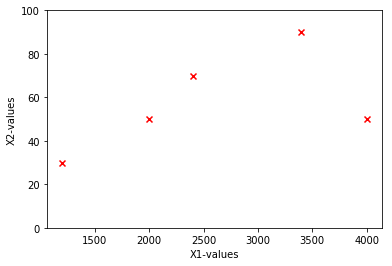

In [2]:
area = np.array([ [1200], [2000], [2400], [3400], [4000]]) #np.array([ [1000, 3], [1500, 4], [1600, 4], [1800, 4], [800, 1]])
price = np.array([[30], [50], [70], [90], [50]])
plt.ylim(0, 100)
plt.xlabel('X1-values')
plt.ylabel('X2-values')
plt.scatter(area, price, color='red', marker='x')

In [3]:
def calcCost(rows, ypred, y):
    cost = 1/(2*rows)
    ypred_minus_y = (np.subtract(y, ypred)) ** 2
    cost = cost * np.sum(ypred_minus_y)
    #print('cost shape -', cost.shape)
    return cost

In [4]:
def calcDw(rows, ypred, x, y):
    subval = np.subtract(ypred, y)
    dw = (1/rows) * np.multiply(x, subval).sum(axis=0)
    #print('dw shape -', dw.shape)
    return dw

In [6]:
def calcDb(rows, ypred, y):
    db = (1/rows) * ((np.subtract(ypred, y)).sum())
    #print('db shape -', db.shape)
    return db

In [7]:
def calcW(aplha, w, dw):
    #dw = dw.reshape(len(dw), 1)
    newW = np.subtract(w, (aplha * dw))
    #print('w shape -', newW.shape, ' ', dw.shape)
    return newW

In [8]:
def calcB(alpha, b, db):
    newB = np.subtract(b, np.multiply(alpha, db).sum())
    #print('b shape -', newB.shape)
    return newB

5
[[14.93610053]] [19.71378137]


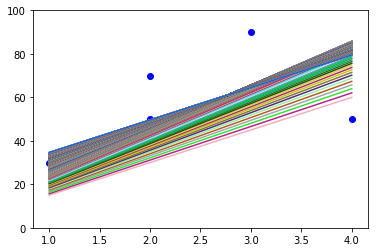

In [17]:
area = np.array([ [1200], [2000], [2400], [3400], [4000]]) #np.array([ [1000, 3], [1500, 4], [1600, 4], [1800, 4], [800, 1]])
price = np.array([[30], [50], [70], [90], [50]])
#plt.xlim(0,10)
area[:,0] = area[:,0]/1000

plt.ylim(0,100)
plt.scatter(area, price, marker="o", color="blue")
w = np.array([[15]])#np.array([[0], [0]])
rows = len(price)
ypred=np.zeros((rows,1))
b = np.array([0])
alpha = 0.01
print(rows)
for i in range(500):
    ypred = np.dot(area, w) + b
    plt.plot(area, ypred, color=np.random.rand(3,))
    cost = calcCost(rows, ypred, price)
    dw = calcDw(rows, ypred, area, price)
    db = calcDb(rows, ypred, price)
    w = calcW(alpha, w, dw)
    b = calcB(alpha, b, db)
    #print("iteration #", i, "Ypred = \n", ypred,  "Cost = ", cost, "dw = ", dw, "db = ", db, "w = ", w, "b = ", b)
print(w, b)